<h1>Statistics</h1>
<h3>Normal, Student's Distributions</h3>

In [1]:
from scipy.stats import norm, t
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
# create frozen RVs for standard normal and Student's with 30, 100 degrees of freedom
rv_t30, rv_t100, rv_norm = t(30), t(100), norm()

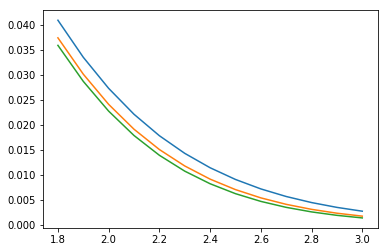

In [3]:
# calculate tail probabilities Pr(|Z|>z) at some points
Z = np.linspace(1.8, 3, 13)
tail_probs = {rv_t30: [], rv_t100: [], rv_norm: []}
for z in Z:
    for rv in tail_probs:
        tail_probs[rv].append(1 - rv.cdf(z))
# FIGURE 3.3. explains that normal distribution is good for testing significance
for rv in tail_probs:
    plt.plot(Z, tail_probs[rv])

<h3>F-distribution</h3>

In [4]:
from scipy.stats import f
rv_f4_58 = f(4, 58)
# 3.16 F statistics calculation
F = ((32.81-29.43)/(9-5)) / (29.43/(67-9))
# tail probability
1 - rv_f4_58.cdf(F)

0.1703876176583532

<h3>Mean, Variance, Standard Deviation</h3>

In [5]:
values = np.array([-14.82381293, -0.29423447, -13.56067979, -1.6288903, -0.31632439,
                   0.53459687, -1.34069996, -1.61042692, -4.03220519, -0.24332097])

In [6]:
print('mean:              ', np.mean(values))
print('variance:          ', np.var(values))
print('standard deviation:', np.std(values))
print('---- unbiased estimates ----')
# ddof means Delta Degrees of Freedom
print('variance:          ', np.var(values, ddof=1))
print('standard deviation:', np.std(values, ddof=1))

mean:               -3.7315998049999997
variance:           28.822364260579157
standard deviation: 5.36864640860051
---- unbiased estimates ----
variance:           32.024849178421285
standard deviation: 5.659050201086865


<h3>Variance-Covariance, Correlation Matrix</h3>

In [7]:
import pandas as pd

In [8]:
data = pd.read_csv("../data/Prostate Cancer.txt") 
names = ['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']
X = data[names].values

In [9]:
# correlation matrix using pandas
data[names].corr()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
lcavol,1.000000,0.280521,0.225000,0.027350,0.538845,0.675310,0.432417,0.433652
lweight,0.280521,1.000000,0.347969,0.442264,0.155385,0.164537,0.056882,0.107354
age,0.225000,0.347969,1.000000,0.350186,0.117658,0.127668,0.268892,0.276112
lbph,0.027350,0.442264,0.350186,1.000000,-0.085843,-0.006999,0.077820,0.078460
svi,0.538845,0.155385,0.117658,-0.085843,1.000000,0.673111,0.320412,0.457648
lcp,0.675310,0.164537,0.127668,-0.006999,0.673111,1.000000,0.514830,0.631528
gleason,0.432417,0.056882,0.268892,0.077820,0.320412,0.514830,1.000000,0.751905
pgg45,0.433652,0.107354,0.276112,0.078460,0.457648,0.631528,0.751905,1.000000


In [10]:
# correlation matrix using numpy
np.set_printoptions(precision=2, suppress=True)
np.corrcoef(X, rowvar=False)

array([[ 1.  ,  0.28,  0.22,  0.03,  0.54,  0.68,  0.43,  0.43],
       [ 0.28,  1.  ,  0.35,  0.44,  0.16,  0.16,  0.06,  0.11],
       [ 0.22,  0.35,  1.  ,  0.35,  0.12,  0.13,  0.27,  0.28],
       [ 0.03,  0.44,  0.35,  1.  , -0.09, -0.01,  0.08,  0.08],
       [ 0.54,  0.16,  0.12, -0.09,  1.  ,  0.67,  0.32,  0.46],
       [ 0.68,  0.16,  0.13, -0.01,  0.67,  1.  ,  0.51,  0.63],
       [ 0.43,  0.06,  0.27,  0.08,  0.32,  0.51,  1.  ,  0.75],
       [ 0.43,  0.11,  0.28,  0.08,  0.46,  0.63,  0.75,  1.  ]])

In [11]:
# variance-covariance
np.cov(X, rowvar=False)

array([[  1.39,   0.14,   1.97,   0.05,   0.26,   1.11,   0.37,  14.42],
       [  0.14,   0.18,   1.11,   0.27,   0.03,   0.1 ,   0.02,   1.3 ],
       [  1.97,   1.11,  55.43,   3.78,   0.36,   1.33,   1.45,  57.98],
       [  0.05,   0.27,   3.78,   2.1 ,  -0.05,  -0.01,   0.08,   3.21],
       [  0.26,   0.03,   0.36,  -0.05,   0.17,   0.39,   0.1 ,   5.34],
       [  1.11,   0.1 ,   1.33,  -0.01,   0.39,   1.96,   0.52,  24.91],
       [  0.37,   0.02,   1.45,   0.08,   0.1 ,   0.52,   0.52,  15.31],
       [ 14.42,   1.3 ,  57.98,   3.21,   5.34,  24.91,  15.31, 795.47]])

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_transformed = scaler.transform(X)
# transformed variance-covariance matrix (nearly equals to correlation matrix)
np.cov(X_transformed, rowvar=False)

array([[ 1.01,  0.28,  0.23,  0.03,  0.54,  0.68,  0.44,  0.44],
       [ 0.28,  1.01,  0.35,  0.45,  0.16,  0.17,  0.06,  0.11],
       [ 0.23,  0.35,  1.01,  0.35,  0.12,  0.13,  0.27,  0.28],
       [ 0.03,  0.45,  0.35,  1.01, -0.09, -0.01,  0.08,  0.08],
       [ 0.54,  0.16,  0.12, -0.09,  1.01,  0.68,  0.32,  0.46],
       [ 0.68,  0.17,  0.13, -0.01,  0.68,  1.01,  0.52,  0.64],
       [ 0.44,  0.06,  0.27,  0.08,  0.32,  0.52,  1.01,  0.76],
       [ 0.44,  0.11,  0.28,  0.08,  0.46,  0.64,  0.76,  1.01]])

<h1>Linear Algebra</h1>
<h3>QR Factorization</h3>

In [13]:
a = np.random.randn(9, 6)
# q.T @ q == I, r is upper triangular
q, r = np.linalg.qr(a)
print(q, '\n\n', r)

[[-0.59  0.16 -0.12  0.67  0.2   0.11]
 [-0.08 -0.17 -0.58 -0.24 -0.18  0.18]
 [ 0.47  0.09 -0.52  0.15  0.59  0.12]
 [-0.33 -0.62 -0.31 -0.15  0.07 -0.48]
 [-0.   -0.28  0.18  0.28 -0.27  0.18]
 [ 0.21 -0.   -0.34  0.52 -0.44 -0.27]
 [-0.26  0.13 -0.31 -0.21 -0.31  0.61]
 [ 0.41 -0.04 -0.04  0.13 -0.43 -0.  ]
 [-0.18  0.67 -0.19 -0.21 -0.19 -0.48]] 

 [[-2.74 -0.23  0.46  0.7   0.86 -0.61]
 [ 0.    3.83 -1.12 -0.17 -1.1  -0.02]
 [ 0.    0.    2.11 -1.07 -0.09 -0.93]
 [ 0.    0.    0.   -1.84  0.74 -0.11]
 [ 0.    0.    0.    0.   -1.61  0.71]
 [ 0.    0.    0.    0.    0.   -2.68]]


In [27]:
X = np.array([[3, 4], [1, -1], [0, 1]])
y = np.array([[1], [0], [2]])
H = X @ np.linalg.inv(X.T @ X) @ X.T
y_hat = H @ y

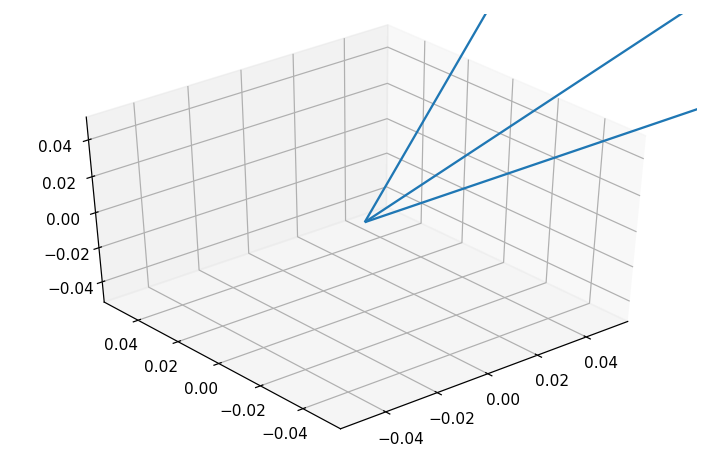

In [29]:
fig = plt.figure(figsize=(8, 5), dpi=110)
fig.subplots_adjust(bottom=0.1)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(40, 230)
origin = [0, 0, 0]
zip(origin, origin, origin)
U, V, W = zip(X[:,0],X[:,1], np.squeeze(y))
ax.quiver(*zip(origin, origin, origin), U,V,W)

In [25]:
X

(0, 0, 0)